In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
for i in df.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [5]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Analysis and Visualizations**

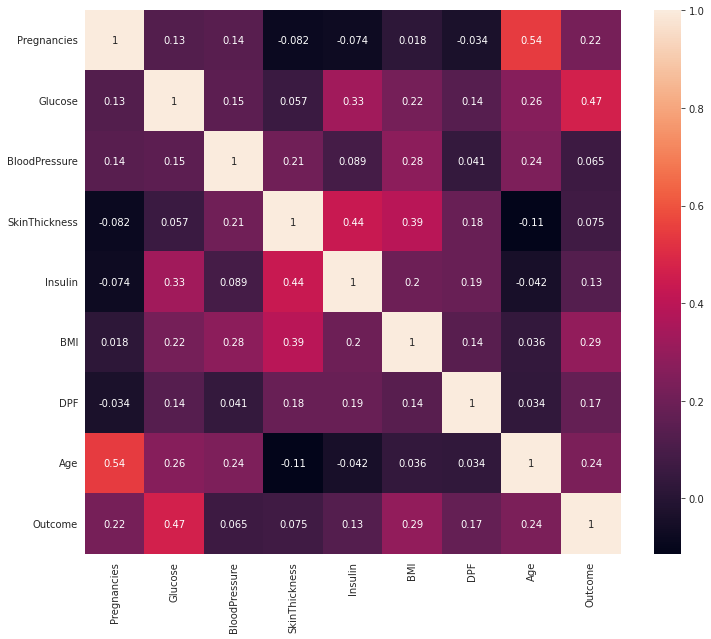

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

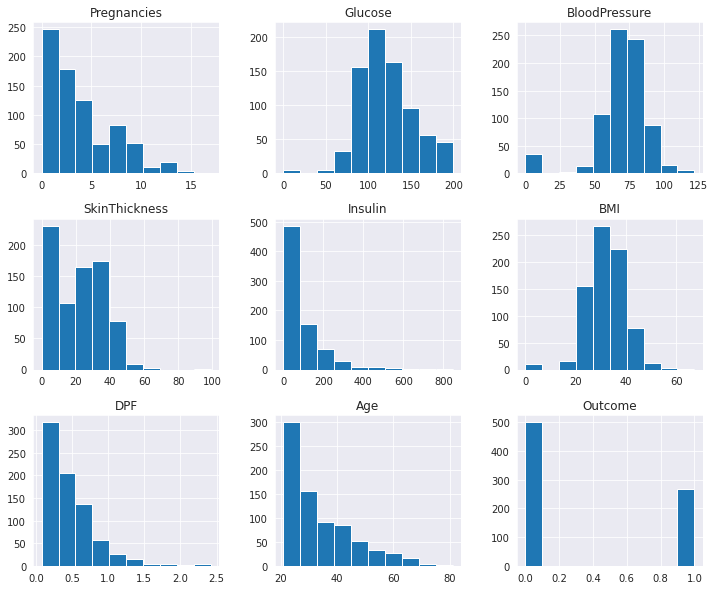

In [10]:
df.hist(figsize=(12,10))
plt.show()

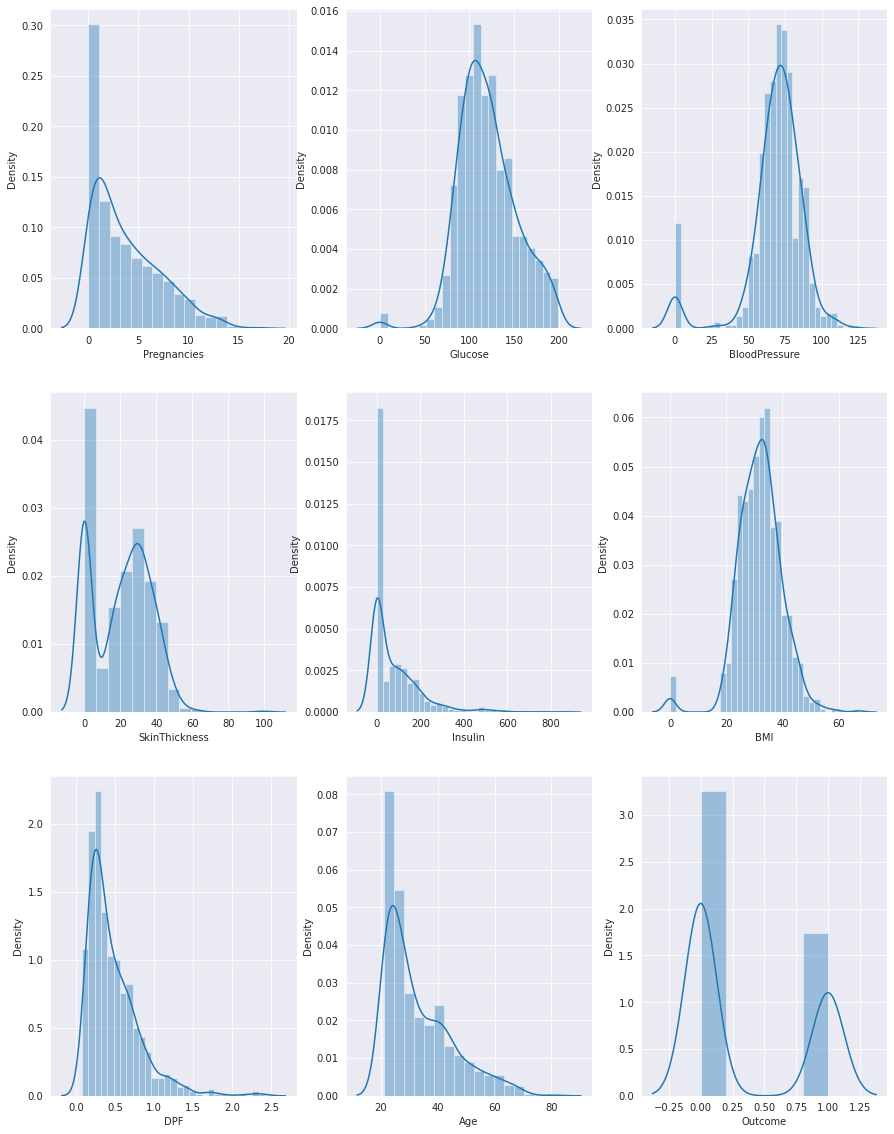

In [11]:
plt.figure(figsize=(15,20))
number=1

for columns in df:
    if number<=9:
        ax=plt.subplot(3,3,number)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    number +=1
plt.show()

In [12]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


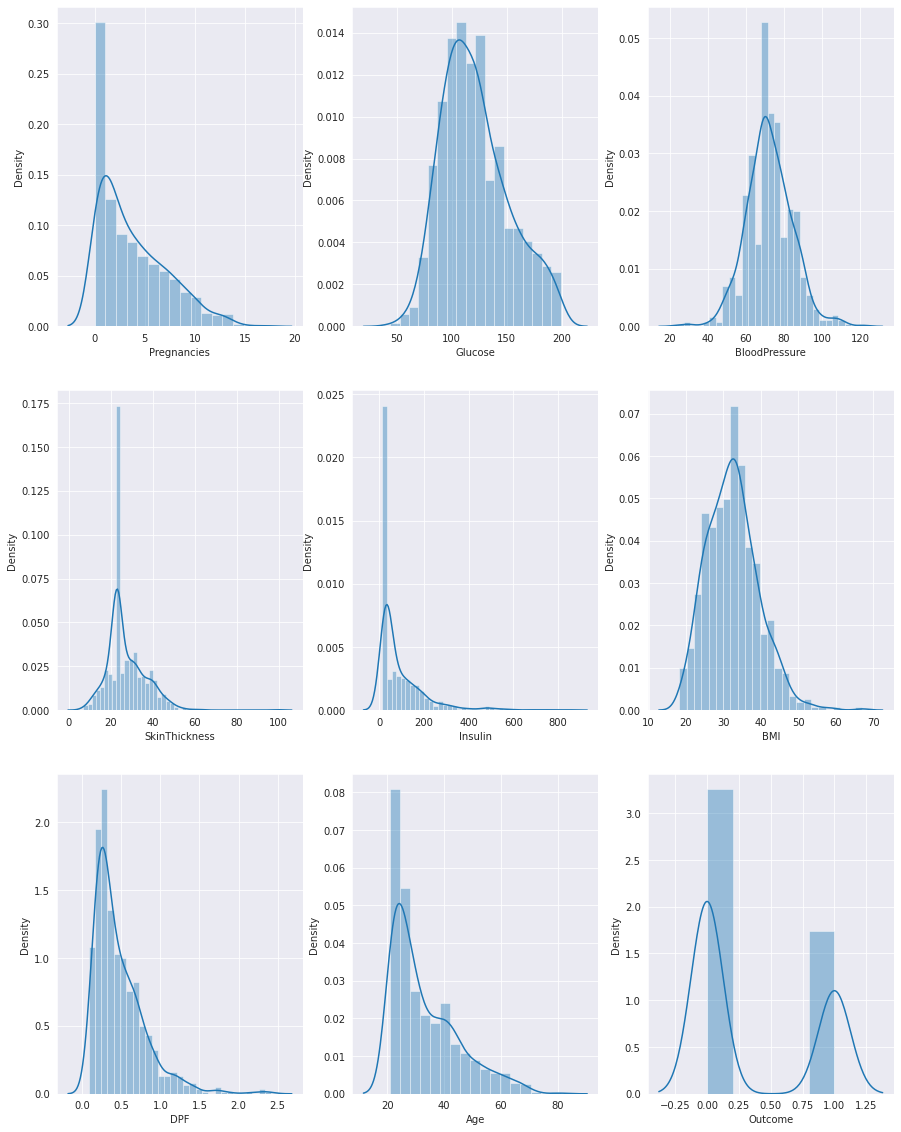

In [14]:
plt.figure(figsize=(15,20))
number=1

for columns in df:
    if number<=9:
        ax=plt.subplot(3,3,number)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    number +=1
plt.show()

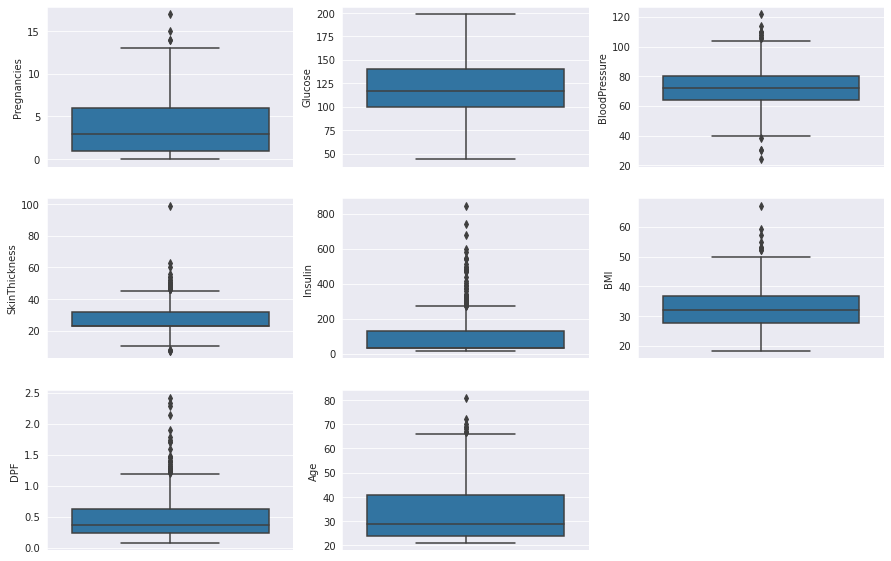

In [15]:
plt.figure(figsize=(15,10))
num=1

for column in df:
    if num<=8:
        ax=plt.subplot(3,3,num)
        sns.boxplot(y=df[column],data=df)
    num+=1
plt.show()

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

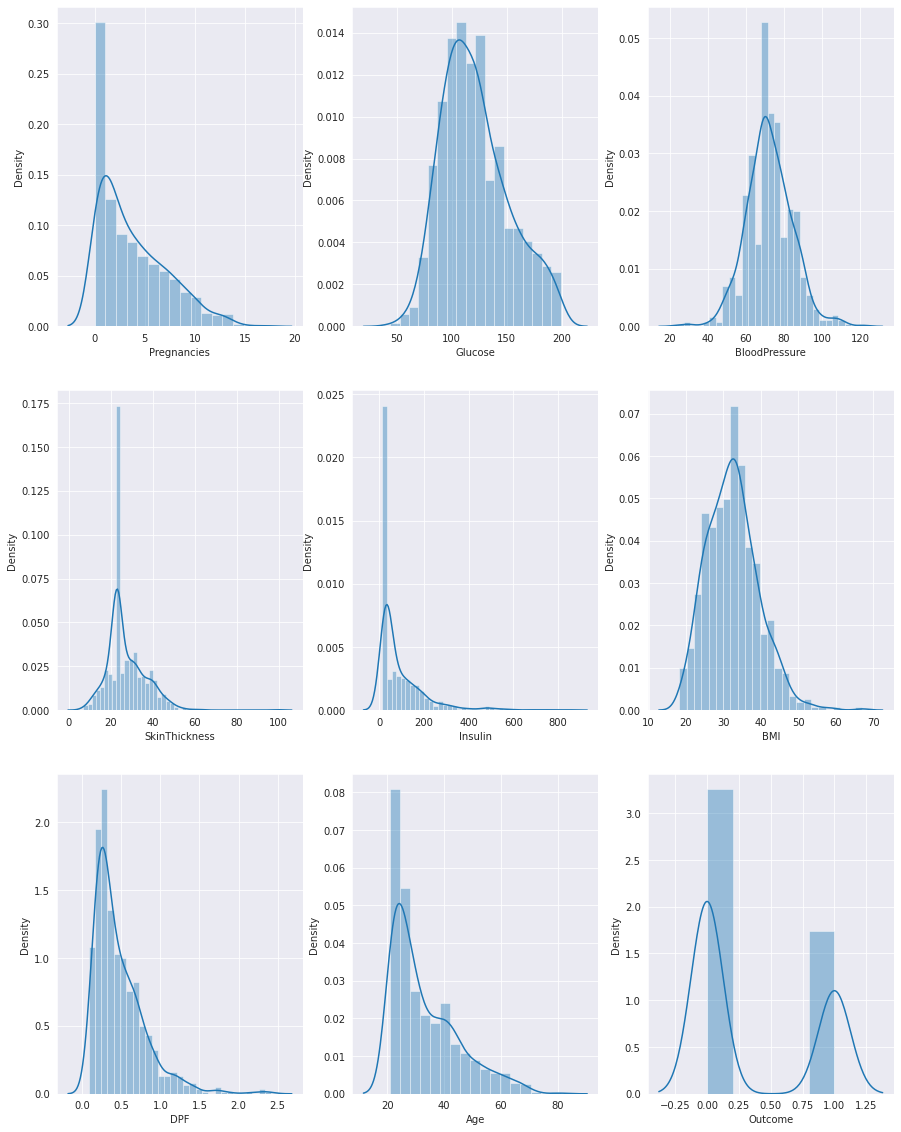

In [17]:
plt.figure(figsize=(15,20))
number=1

for columns in df:
    if number<=9:
        ax=plt.subplot(3,3,number)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    number +=1
plt.show()

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


In [19]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [20]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)

In [21]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


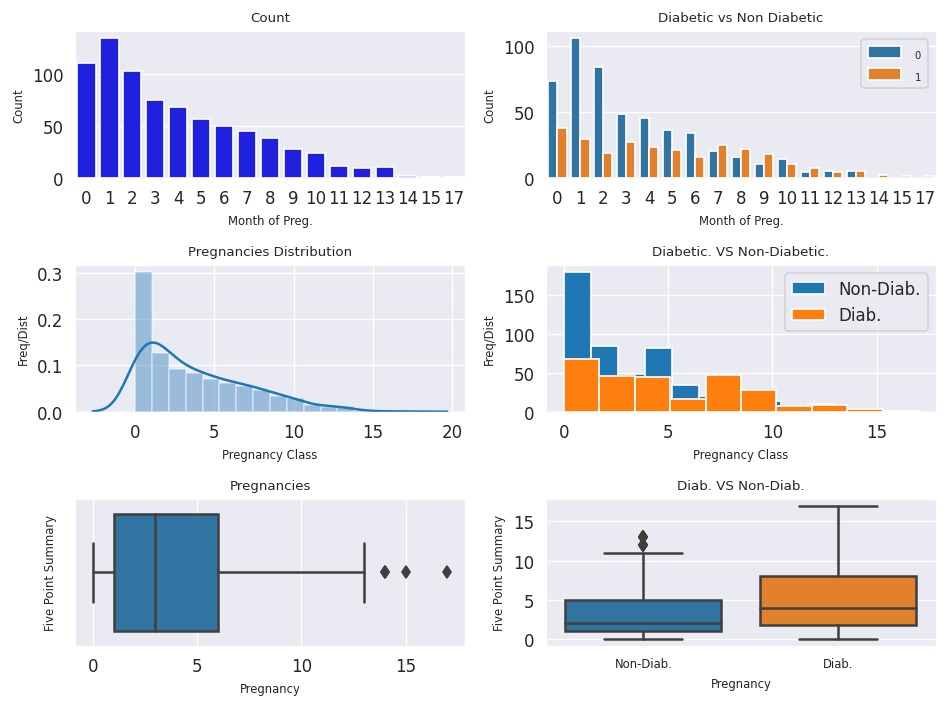

In [22]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))
plot00=sns.countplot('Pregnancies',data=df,ax=axes[0][0],color='blue')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=axes[0][1])
plot01.set_title('Diabetic vs Non Diabetic',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.distplot(df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()


plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diabetic. VS Non-Diabetic.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.tight_layout()

plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='h')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()


plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

In [23]:
df.Glucose.describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

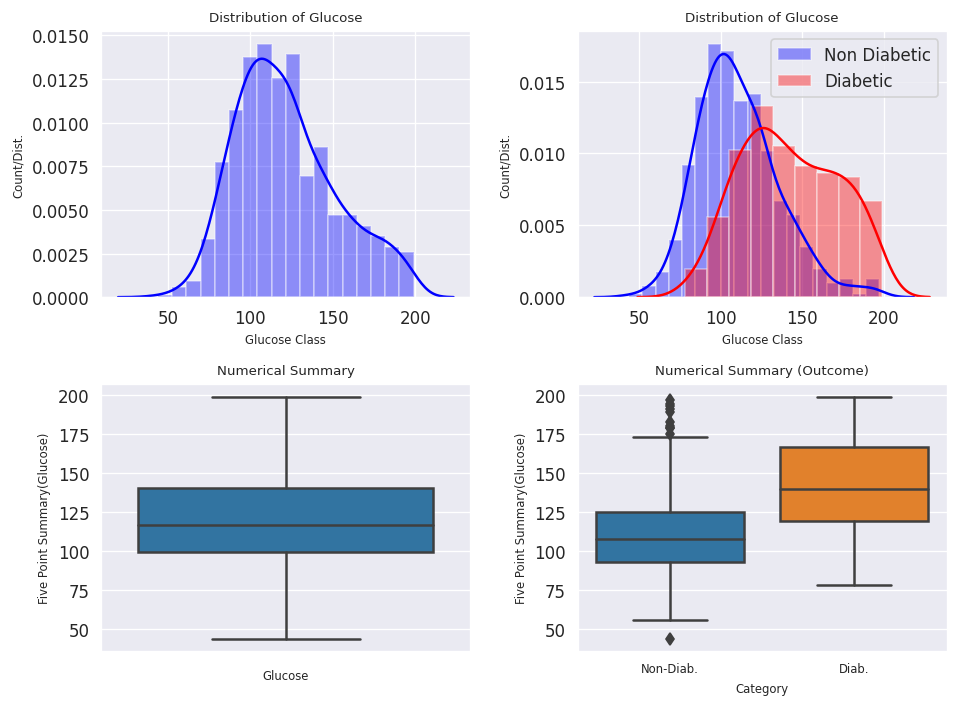

In [24]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(df['Glucose'],ax=axes[0][0],color='blue')
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['Glucose'],ax=axes[0][1],color='blue',label='Non Diabetic')
sns.distplot(df[df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diabetic')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)

plot10=sns.boxplot(y=df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [25]:
df['BloodPressure'].describe()

count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

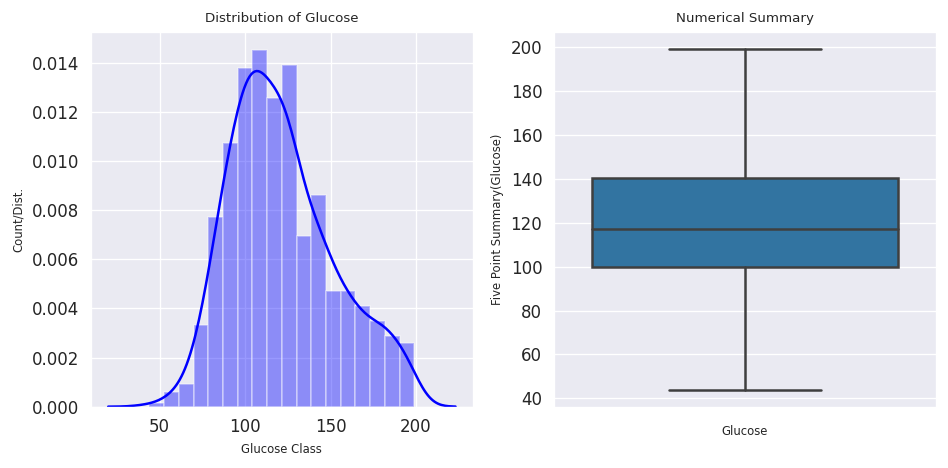

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(y=df[df['Glucose']!=0]['Glucose'],ax=axes[1])
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7fe4d91dba10>,
 [Text(0.0, 0, 'Non Diabetic'), Text(0.2, 0, 'Diabetic')])

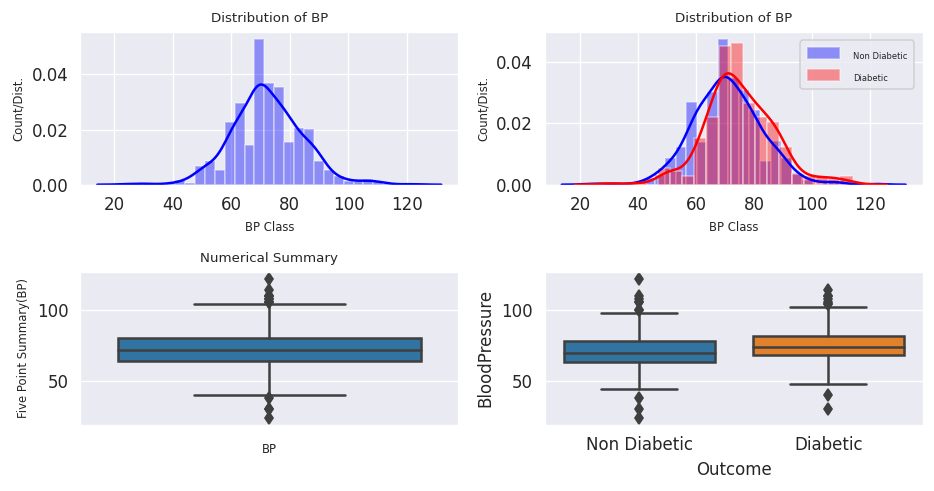

In [27]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],color='blue',ax=axes[0][0])
axes[0][0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==0]['BloodPressure'],ax=axes[0][1],color='blue',label='Non Diabetic')
sns.distplot(df[df['Outcome']==1]['BloodPressure'],ax=axes[0][1],color='red',label='Diabetic')
axes[0][1].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][1].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='5')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='5')
plt.tight_layout()

plot10=sns.boxplot(y=df['BloodPressure'],ax=axes[1][0])
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('BP',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y="BloodPressure",data=df,ax=axes[1][1])
plt.xticks(ticks=[0,1],labels=['Non Diabetic','Diabetic'])

<Figure size 720x480 with 0 Axes>

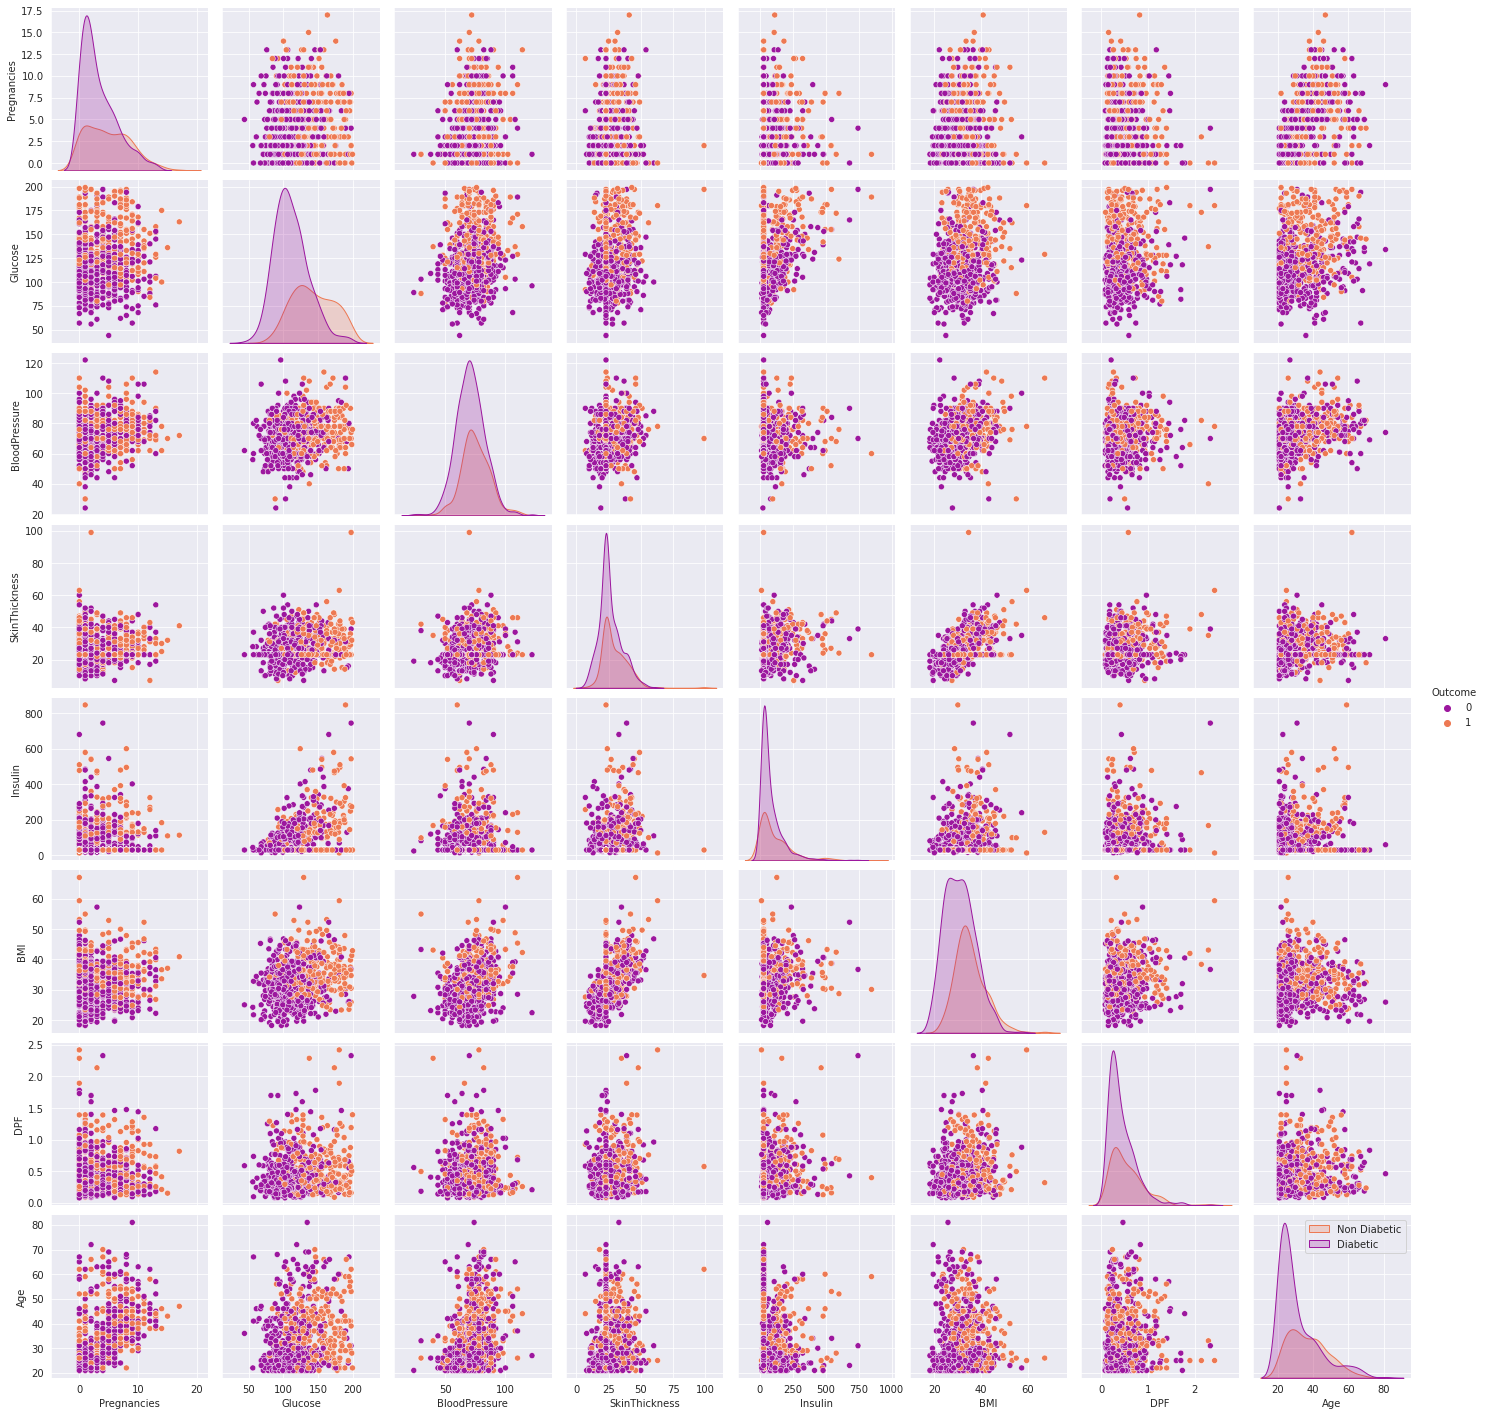

In [28]:
plt.figure(dpi=120)
sns.pairplot(df,hue='Outcome',palette='plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

In [29]:
df.corr().loc['Glucose']

Pregnancies      0.127964
Glucose          1.000000
BloodPressure    0.219666
SkinThickness    0.172361
Insulin          0.357081
BMI              0.231478
DPF              0.137106
Age              0.266600
Outcome          0.492908
Name: Glucose, dtype: float64

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.12796381756932743


<Figure size 500x400 with 0 Axes>

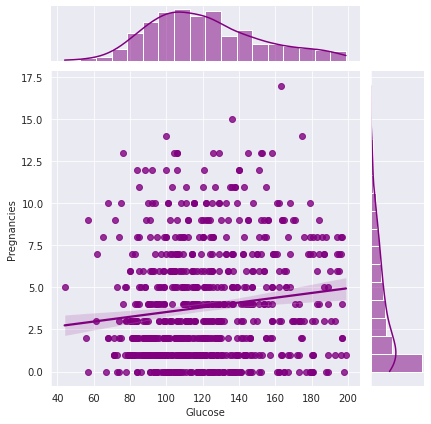

Correlation between Glucose and BloodPressure ==>  0.21966569657774088


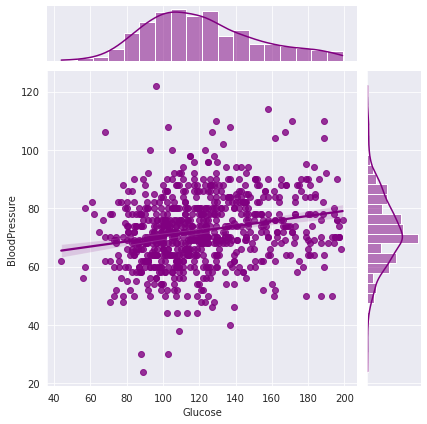

Correlation between Glucose and SkinThickness ==>  0.17236083504189836


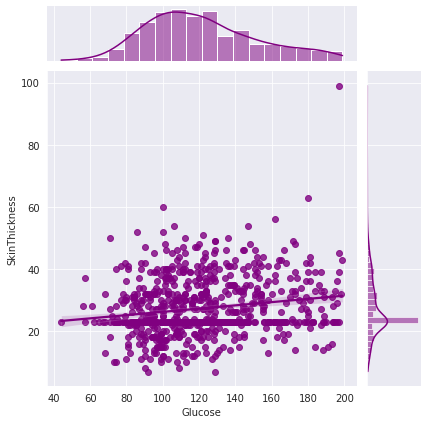

Correlation between Glucose and Insulin ==>  0.357080722696078


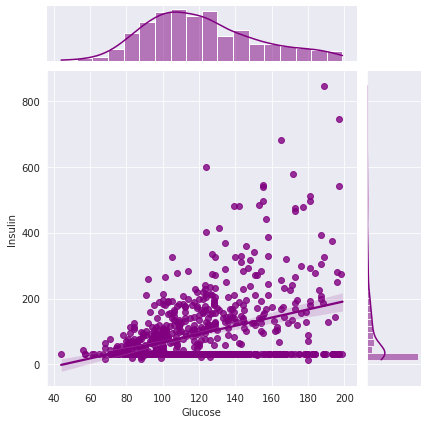

Correlation between Glucose and BMI ==>  0.2314775020863127


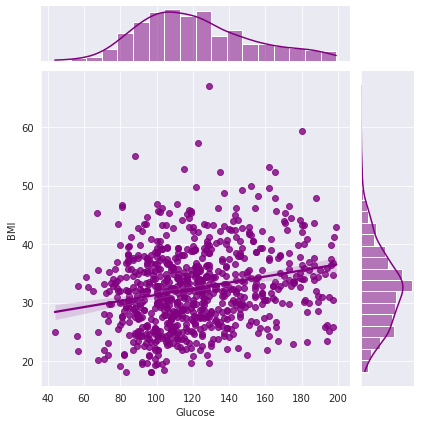

Correlation between Glucose and DPF ==>  0.1371063599357901


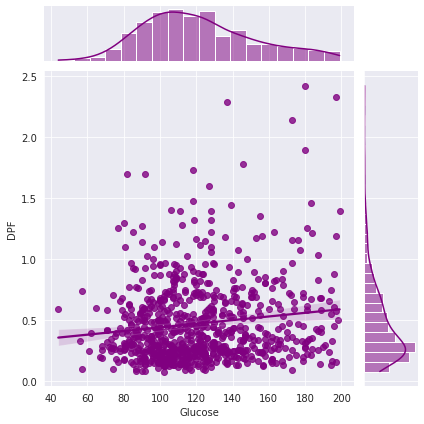

Correlation between Glucose and Age ==>  0.26659989338204987


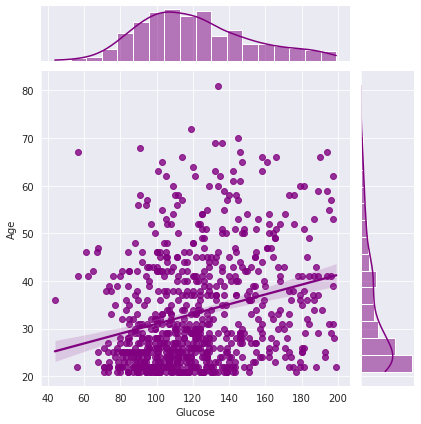

In [30]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'reg',color = 'purple')
        plt.show()

Joint Plot of Insulin with Other Variables:
Correlation Insulin and Pregnancies ==>  -0.05569739755528366


<Figure size 500x400 with 0 Axes>

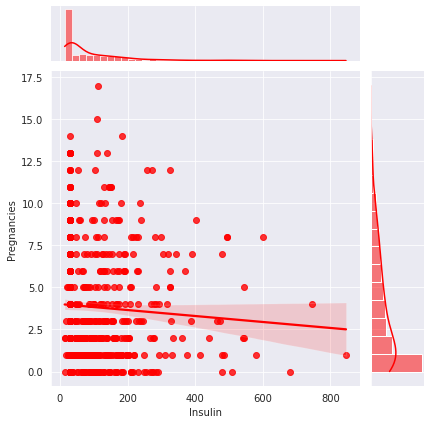

Correlation Insulin and Glucose ==>  0.357080722696078


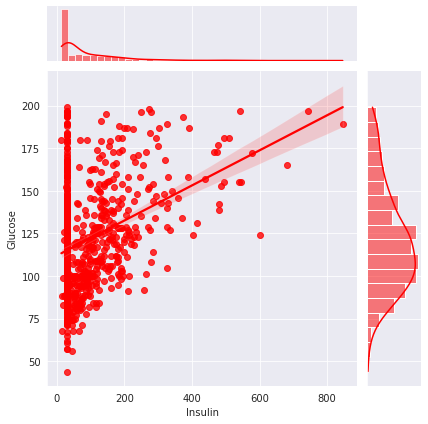

Correlation Insulin and BloodPressure ==>  -0.0220494113520635


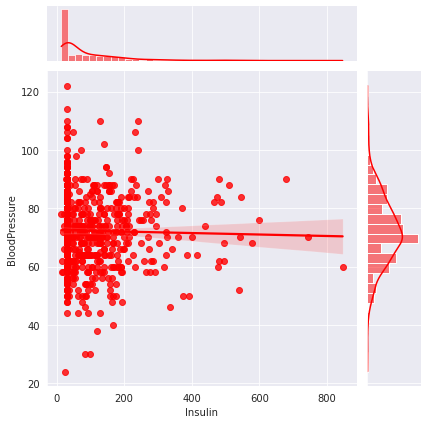

Correlation Insulin and SkinThickness ==>  0.23818836644390778


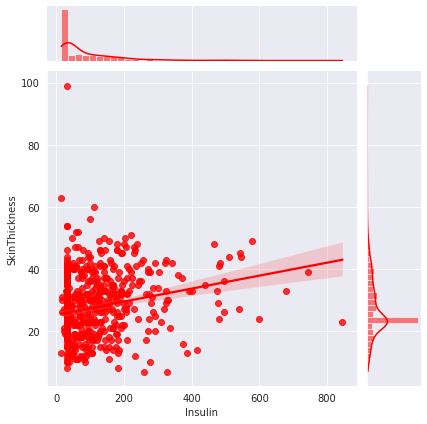

Correlation Insulin and BMI ==>  0.18903084508399412


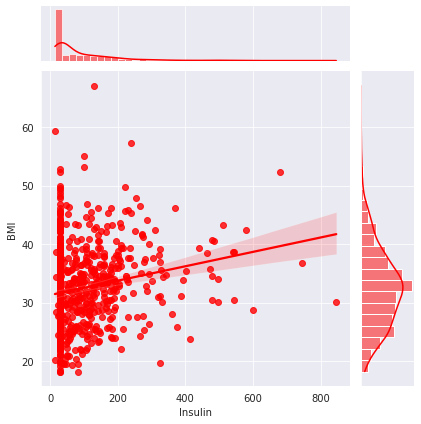

Correlation Insulin and DPF ==>  0.17802935050215637


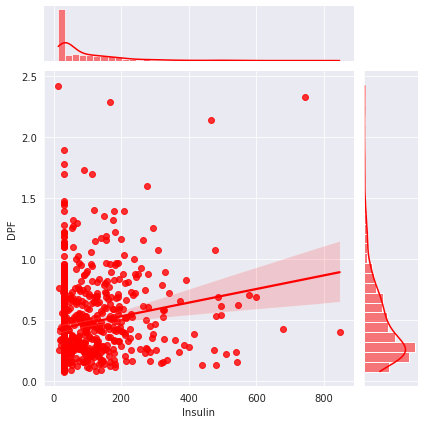

Correlation Insulin and Age ==>  -0.015412729547878189


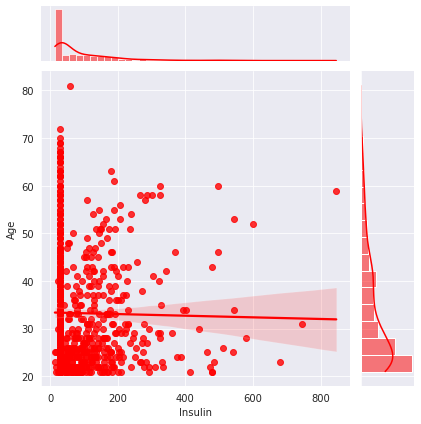

In [31]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint Plot of Insulin with Other Variables:")
for i in df.columns:
    if i!='Insulin' and i!='Outcome':
        print(f"Correlation Insulin and {i} ==> ",df.corr().loc['Insulin'][i])
        sns.jointplot(x='Insulin',y=i,data=df,kind='reg',color='red')
        plt.show()

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


**Model Building**

In [33]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI', 'Age']]
y=df['Outcome']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

**Decision Tree**

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 75)), 'min_samples_split': [2, 3, 4,5,6]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)
y_pred = grid_search_cv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("The Accuracy of Decision Tree is: ",score*100)

Fitting 5 folds for each of 730 candidates, totalling 3650 fits
The Accuracy of Decision Tree is:  72.2943722943723


**Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,12,16,20,25],
    'min_samples_split': [2, 3, 4,5,6],
    'min_samples_leaf': [2,3, ],
    'n_estimators': [10,20,30,40,50,75 ]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
y_pred1 = grid_search.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)
print("The Accuracy of Random Forest is: ",score1*100)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
The Accuracy of Random Forest is:  76.19047619047619


**XgBoost**

In [37]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)
print("The Accuracy of XgBoost is: ",score2*100)

The Accuracy of XgBoost is:  74.45887445887446


**Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
logistic.fit(X_train, y_train)
y_pred3=logistic.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)

from sklearn.metrics import accuracy_score
print("The Accuracy of Logistic Regression is:", accuracy_score(y_test,y_pred3)*100)

The Accuracy of Logistic Regression is: 73.16017316017316


**Model Comparision**

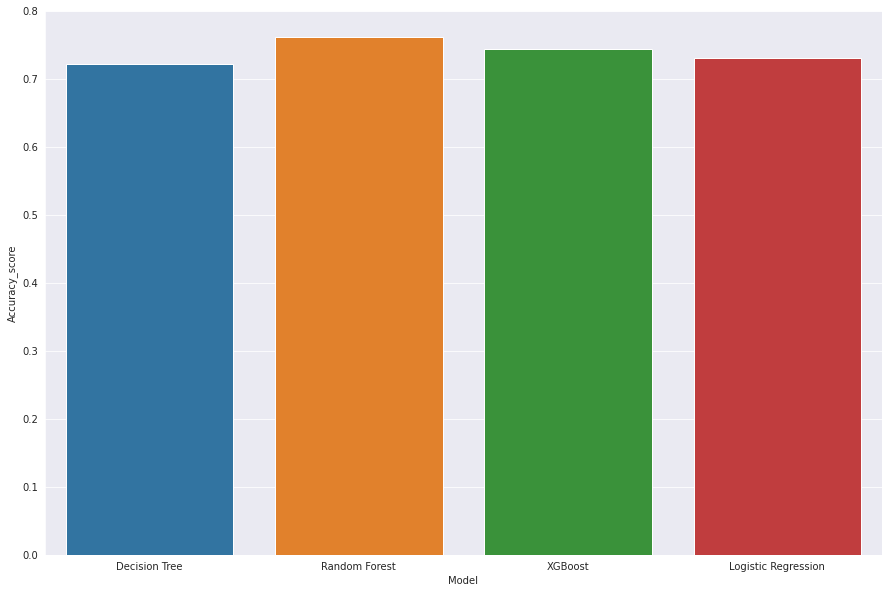

In [39]:
plt.figure(figsize=(15,10))
models = pd.DataFrame({
    'Model':[ 'Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy_score' :[score, score1, score2, score3]
})
models
sns.barplot(x='Model', y='Accuracy_score', data=models)

In [40]:
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
1,Random Forest,0.761905
2,XGBoost,0.744589
3,Logistic Regression,0.731602
0,Decision Tree,0.722944


**Test Cases**

In [41]:
data = np.array([[1,89,66,94,28,21]])
prediction = grid_search.predict(data)
print(prediction)

[0]


In [42]:
data = np.array([[0,137,40,168,43.1,33]])
prediction = grid_search.predict(data)
print(prediction)

[1]


In [43]:
data = np.array([[10,115,0,0,35,29]])
prediction = grid_search.predict(data)
print(prediction)

[0]


**Saving the Model**

In [44]:
import pickle
pickle_out = open("grid_search.pkl", "wb") 
pickle.dump(grid_search, pickle_out) 
pickle_out.close()

**Conclusion**

Thus, we can conclude that Random Forest is the best performing algorithm out of all the algorithms implemented by giving an accuracy of 76%